# Stock Forecasting using Orbit EDA

https://github.com/uber/orbit

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import orbit
from orbit.eda import eda_plot

import yfinance as yf
yf.pdr_override()

In [2]:
print(orbit.__version__)

1.0.17


In [3]:
stock = 'AMD' # input
start = '2017-01-01' # input 
end = '2021-11-08'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df = df.reset_index()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1216,2021-11-01,119.449997,125.669998,118.129997,125.230003,125.230003,54559800
1217,2021-11-02,124.980003,128.460007,124.199997,127.629997,127.629997,53491900
1218,2021-11-03,127.750000,130.600006,126.790001,130.529999,130.529999,59537800
1219,2021-11-04,132.009995,139.000000,130.770004,137.500000,137.500000,84825200
1220,2021-11-05,139.190002,141.220001,134.419998,136.339996,136.339996,64878000


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,11.42,11.65,11.02,11.43,11.43,55182000
1,2017-01-04,11.45,11.52,11.24,11.43,11.43,40781200
2,2017-01-05,11.43,11.69,11.23,11.24,11.24,38855200
3,2017-01-06,11.29,11.49,11.11,11.32,11.32,34453500
4,2017-01-09,11.37,11.64,11.31,11.49,11.49,37304800


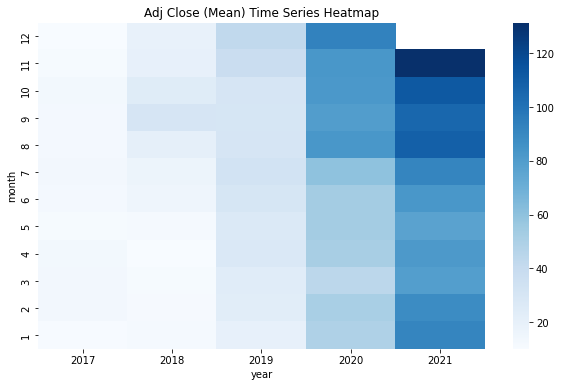

In [6]:
_ = eda_plot.ts_heatmap(df = df, date_col = 'Date', value_col='Adj Close')

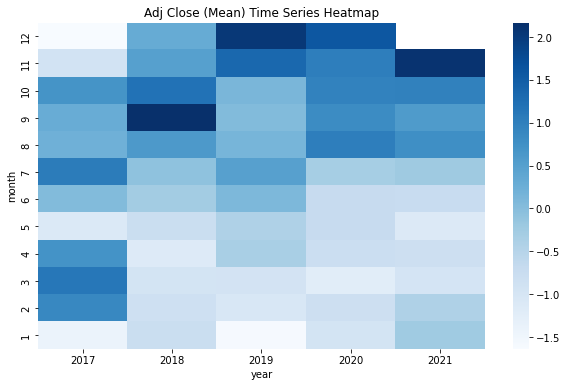

In [7]:
_ = eda_plot.ts_heatmap(df = df, date_col = 'Date', value_col='Adj Close', normalization=True)

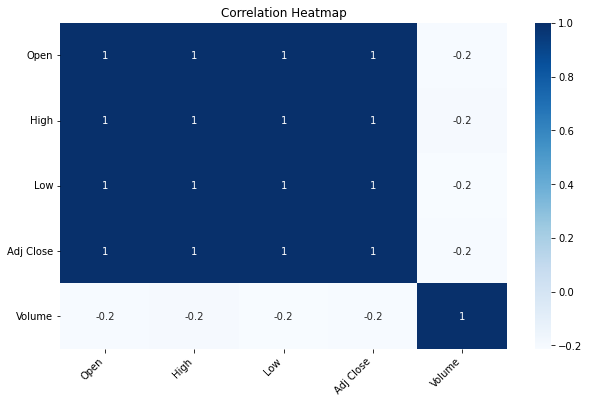

In [8]:
var_list = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
_ = eda_plot.correlation_heatmap(df, var_list = var_list, 
                                 fig_width=10, fig_height=6)

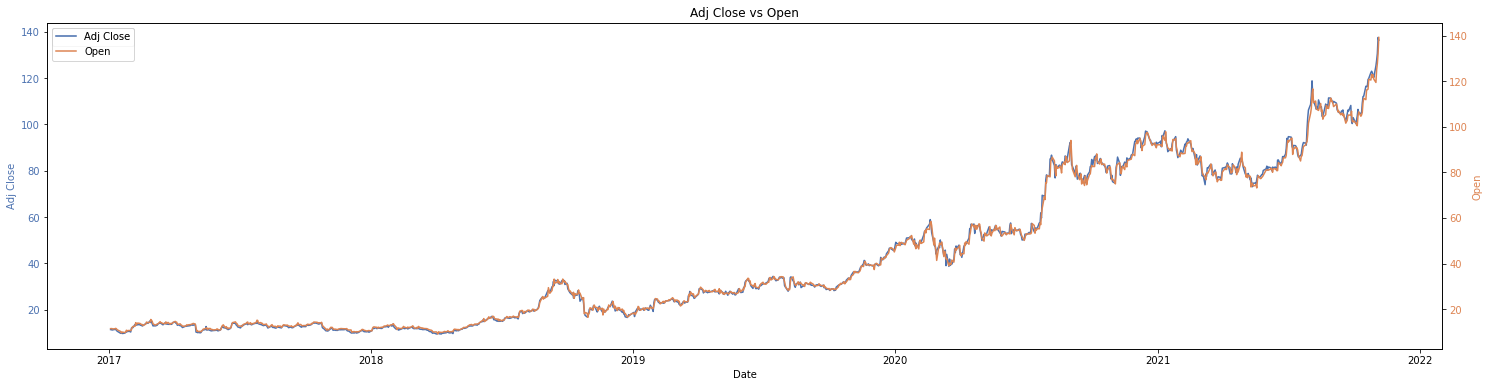

In [9]:
_ = eda_plot.dual_axis_ts_plot(df=df, var1='Adj Close', var2='Open', date_col='Date')

In [10]:
var_list=['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume']   
df[var_list].melt(id_vars = ['Date'])

,Date,variable,value
0,2017-01-03,Open,11.42
1,2017-01-04,Open,11.45
2,2017-01-05,Open,11.43
3,2017-01-06,Open,11.29
4,2017-01-09,Open,11.37
...,...,...,...
6100,2021-11-01,Volume,54559800.00
6101,2021-11-02,Volume,53491900.00
6102,2021-11-03,Volume,59537800.00
6103,2021-11-04,Volume,84825200.00


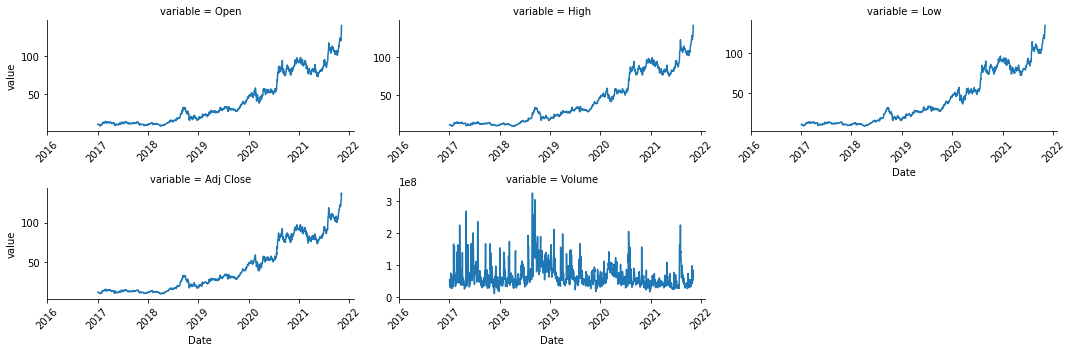

In [11]:
_ = eda_plot.wrap_plot_ts(df, 'Date', var_list)